In [8]:
#📦 1. Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [9]:
#📂 2. Load Dataset
import pandas as pd

df = pd.read_csv("synthetic_ecommerce_churn_dataset.csv")
df.head()


,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


In [10]:
#🔍 3. Basic Data Understanding
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


customer_id             0
age                     0
gender                  0
country                 0
avg_order_value       250
total_orders            0
last_purchase           0
is_fraudulent           0
preferred_category      0
email_open_rate       250
customer_since          0
loyalty_score           0
churn_risk              0
dtype: int64

In [11]:
#🧹 4. Data Cleaning
# Fill missing email_open_rate with median
df['email_open_rate'].fillna(df['email_open_rate'].median(), inplace=True)


In [13]:
#Convert Date Column
df['customer_since'] = pd.to_datetime(df['customer_since'])
df['customer_tenure_days'] = (pd.Timestamp.today() - df['customer_since']).dt.days
df.drop(columns=['customer_id', 'customer_since'], inplace=True)



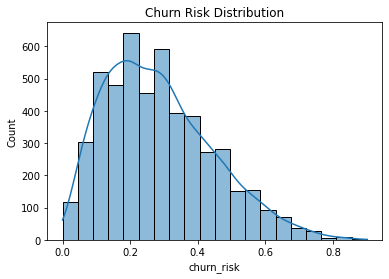

In [14]:
#📊 5. Exploratory Data Analysis (EDA)
#Churn Risk Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['churn_risk'], bins=20, kde=True)
plt.title("Churn Risk Distribution")
plt.show()


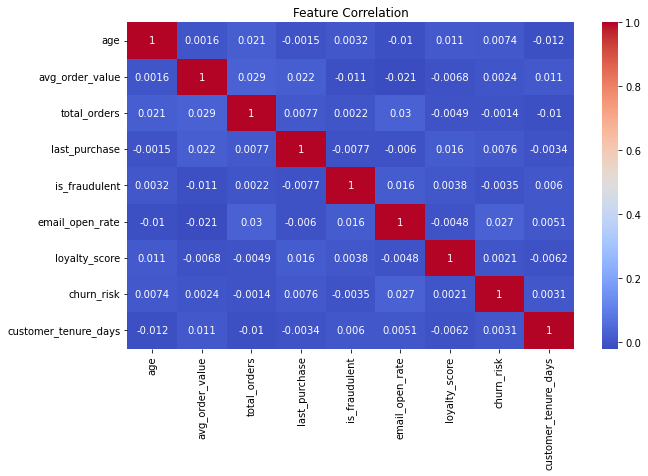

In [16]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()




In [17]:
#🏗️ 6. Feature & Target Split
X = df.drop('churn_risk', axis=1)
y = df['churn_risk']


In [18]:
#🧠 7. Preprocessing Pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)


In [19]:
#✂️ 8. Train–Test Spli
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
#🤖 9. Model 1 – Linear Regression
X_train.isnull().sum().sort_values(ascending=False)
from sklearn.impute import SimpleImputer
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'avg_order_value', 'total_orders', 'last_purchase',
       'is_fraudulent', 'email_open_rate', 'loyalty_score',
       'customer_tenure_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
            

In [25]:
y_pred_lr = lr_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


MAE: 0.126555966796875
RMSE: 0.1575049782523296
R2 Score: -0.0067096453675261625


In [28]:
#🌲  Model 2 – Random Forest Regressor
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=100,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'avg_order_value', 'total_orders', 'last_purchase',
       'is_fraudulent', 'email_open_rate', 'loyalty_score',
       'customer_tenure_days'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
            

In [27]:
y_pred_rf = rf_model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


MAE: 0.12816450000000001
RMSE: 0.15941673428470424
R2 Score: -0.03129633861181924


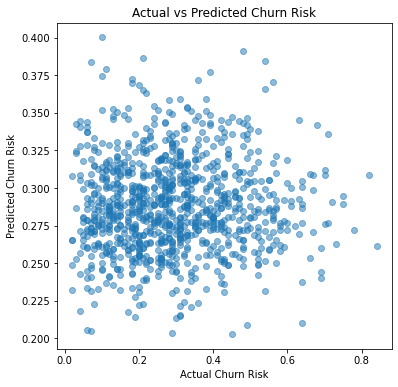

In [30]:
#📈 11. Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("Actual Churn Risk")
plt.ylabel("Predicted Churn Risk")
plt.title("Actual vs Predicted Churn Risk")
plt.show()


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


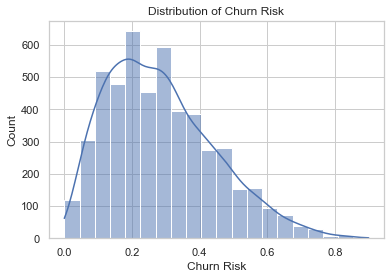

In [32]:
plt.figure(figsize=(6,4))
sns.histplot(df['churn_risk'], bins=20, kde=True)
plt.title("Distribution of Churn Risk")
plt.xlabel("Churn Risk")
plt.ylabel("Count")
plt.show()


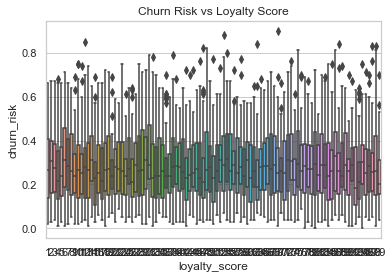

In [33]:
plt.figure(figsize=(6,4))
sns.boxplot(x='loyalty_score', y='churn_risk', data=df)
plt.title("Churn Risk vs Loyalty Score")
plt.show()


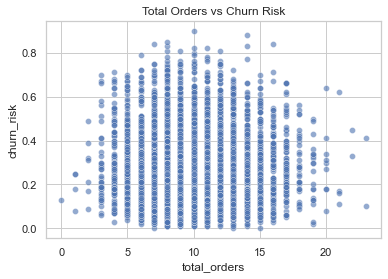

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='total_orders', y='churn_risk', data=df, alpha=0.6)
plt.title("Total Orders vs Churn Risk")
plt.show()


In [37]:
# 1️⃣ Show all original column names
print("Original columns:")
print(df.columns.tolist())

# 2️⃣ Clean column names: remove spaces, lowercase, replace special chars
df.columns = (
    df.columns
      .str.strip()          # remove leading/trailing spaces
      .str.lower()          # convert to lowercase
      .str.replace(' ', '_')  # replace spaces with underscores
)
print("\nCleaned columns:")
print(df.columns.tolist())

# 3️⃣ Optional: find columns containing a keyword (e.g., "purchase")
search_term = 'purchase'
matching_cols = [col for col in df.columns if search_term in col]
print(f"\nColumns containing '{search_term}': {matching_cols}")


Original columns:
['age', 'gender', 'country', 'avg_order_value', 'total_orders', 'last_purchase', 'is_fraudulent', 'preferred_category', 'email_open_rate', 'loyalty_score', 'churn_risk', 'customer_tenure_days']

Cleaned columns:
['age', 'gender', 'country', 'avg_order_value', 'total_orders', 'last_purchase', 'is_fraudulent', 'preferred_category', 'email_open_rate', 'loyalty_score', 'churn_risk', 'customer_tenure_days']

Columns containing 'purchase': ['last_purchase']


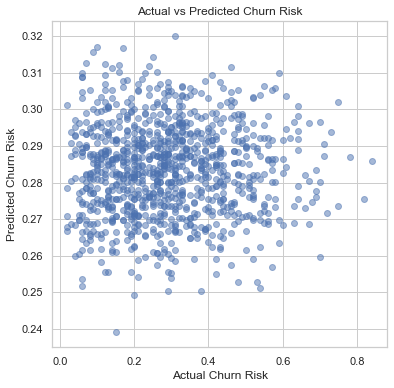

In [40]:
y_pred = lr_model.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Churn Risk")
plt.ylabel("Predicted Churn Risk")
plt.title("Actual vs Predicted Churn Risk")
plt.show()
